# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [51]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [52]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


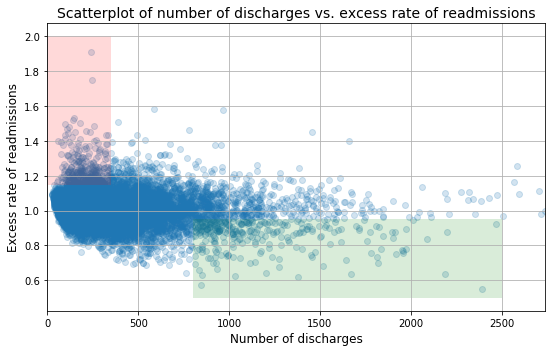

In [53]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A

Overall, rate of readmissions is trending down with increasing number of discharges. With lower number of discharges, there is a greater incidence of excess rate of readmissions, and with higher number of discharges, there is a greater incidence of lower rates of readmissions


# B

In hospitals with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1. 
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [54]:
# create dataframe of data used in analysis
data = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio', 
                              'Predicted Readmission Rate', 'Expected Readmission Rate',
                              'Number of Readmissions']][81:-3].reset_index(drop=True).copy()

# create column for estimated size of the hospital
data['Estimate Size'] = ''

for i,val in enumerate(data['Number of Discharges']):
    if  val < 100:
        data.loc[i, 'Estimate Size'] = 'small'
    elif val > 1000:
        data.loc[i, 'Estimate Size'] = 'large'
    else:
        data.loc[i, 'Estimate Size'] = 'medium'
        
data.sample(5)
print(data)

       Number of Discharges  Excess Readmission Ratio  \
0                        25                    1.0914   
1                        27                    1.0961   
2                        28                    1.0934   
3                        29                    1.0908   
4                        30                    1.1123   
5                        31                    1.0992   
6                        33                    1.0847   
7                        34                    1.0738   
8                        34                    1.0720   
9                        34                    1.0651   
10                       35                    1.0444   
11                       35                    1.0228   
12                       35                    1.0548   
13                       35                    1.0756   
14                       35                    1.0683   
15                       35                    1.0622   
16                       36    

In [55]:
# calculate sample statistics
mean_read = np.mean(data['Excess Readmission Ratio'])
std_read = np.std(data['Excess Readmission Ratio'])

In [56]:
# create dataframes based on estimated size
small = data[data['Estimate Size'] == 'small']
med = data[data['Estimate Size'] == 'medium']
lrg = data[data['Estimate Size'] == 'large']

# compute counts
n = len(data)
n_sm = len(small)
n_med = len(med)
n_lrg = len(lrg)

print('No. of Facilities by Estimated Size')
print(' Small:', n_sm, '\n Medium:', n_med, '\n Large:', n_lrg)

No. of Facilities by Estimated Size
 Small: 1188 
 Medium: 9846 
 Large: 460


In [57]:
# calculate the number of readmision ratios over 1.0
high = np.sum(data['Excess Readmission Ratio'] > 1.0)
sm_high = np.sum(small['Excess Readmission Ratio'] > 1.0)
lrg_high = np.sum(lrg['Excess Readmission Ratio'] > 1.0)

# calculate the percentage of facility with high readmissions ratios
pct_high = high / n
pct_sm_high = sm_high / n_sm
pct_lrg_high = lrg_high / n_lrg

# calculate the mean readmision ratio
mean = np.mean(data['Excess Readmission Ratio'])
mean_sm = np.mean(small['Excess Readmission Ratio'])
mean_lrg = np.mean(lrg['Excess Readmission Ratio'])
print (mean)
print (mean_sm)
print (mean_lrg)

1.007540917000168
1.0226183501683506
0.9790730434782613


In [58]:
# Setup an appropriate hypothesis test
# create bootstrap function
def bootstrap_replicates(data, func=np.mean):
    '''
    A function to take a random sample with replacement
    from the original data array and return a sample
    test statistic.
    
    data = array of original data
    func = test statistic, defaults to mean
    '''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# create empty array for bootstrapping
bs_replicates = np.empty(10000)
bs_small = np.empty(10000)
bs_large = np.empty(10000)
bs_med = np.empty(10000)

# bootstrap 100,000 replicate sample means
for i in range(10000):
    bs_replicates[i] = bootstrap_replicates(data=data['Excess Readmission Ratio'])
    bs_small[i] = bootstrap_replicates(small['Excess Readmission Ratio'])
    bs_med[i] = bootstrap_replicates(med['Excess Readmission Ratio'])
    bs_large[i] = bootstrap_replicates(lrg['Excess Readmission Ratio'])

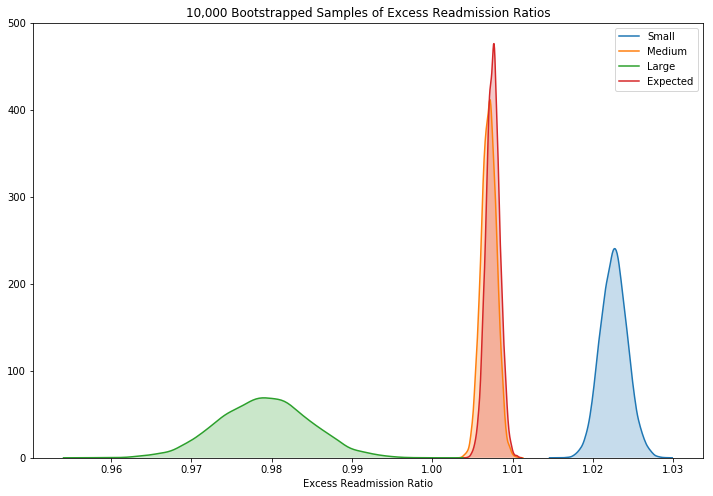

In [59]:
# draw a PDF of the sample means
import seaborn as sns
plt.figure(figsize=(12,8))
ax3 = sns.distplot(bs_small, label='Small', hist=False, kde_kws={"shade": True})
sns.distplot(bs_med, label='Medium', hist=False, kde_kws={"shade": True}, ax=ax3)
sns.distplot(bs_large, label='Large', hist=False, kde_kws={"shade": True}, ax=ax3)
sns.distplot(bs_replicates, label='Expected', hist=False, kde_kws={"shade": True}, ax=ax3)
ax3 = plt.xlabel('Excess Readmission Ratio')
ax3 = plt.title('10,000 Bootstrapped Samples of Excess Readmission Ratios')
ax3 = plt.legend()

A bootstrap analysis is performed by calculating 10,000 mean excess readmission ratios using resampled data from each group

In [60]:
# calculate 95% confidence interval
np.percentile(bs_replicates, [2.5,97.5])

array([1.00585368, 1.00922952])

In [78]:
from scipy import stats
# calculate sample statistics
# calculate the z-score for large facility mean
diff_lrg = mean_lrg - mean_read
z_lrg = diff_lrg / std_read

# calculate the z-score for small facility mean
diff_sm = mean_sm - mean_read
z_sm = diff_sm / std_read

# calculate p-values
pval_lrg = stats.norm.cdf(z_lrg)
pval_sm = stats.norm.cdf(z_sm)

print('Sample Inference')
print('z-score of small facilities ')
print (z_sm)
print('z-score of large facilities ')
print (z_lrg)
print('p-value of small facilities ')
print (pval_sm)
print('p-value of large facilities ')
print (pval_lrg)

Sample Inference
z-score of small facilities 
0.16404993500320358
z-score of large facilities 
-0.30974455325747663
p-value of small facilities 
0.5651540830912931
p-value of large facilities 
0.37837760960646194


In [81]:
# calculate bootstrap statistics
# calculate the z-score for large facility mean
theta_bs = np.std(bs_replicates) / np.sqrt(n)
diff_lrg_bs = np.mean(bs_large) - np.mean(bs_replicates)
z_lrg_bs = diff_lrg_bs / theta_bs

# calculate z-score for small facility mean
diff_sm_bs = np.mean(bs_small) - np.mean(bs_replicates)
z_sm_bs = diff_sm_bs / theta_bs

# calculate p-values
pval_lrg_bs = stats.norm.cdf(z_lrg_bs)
pval_sm_bs = stats.norm.cdf(1-z_sm_bs)

print('Bootstrap Inference')
print('z-score of small facilities ')
print (z_sm_bs)
print('z-score of large facilities ')
print (z_lrg_bs)
print('p-value of small facilities ')
print (pval_sm_bs)
print('p-value of large facilities ')
print (pval_lrg_bs)


Bootstrap Inference
z-score of small facilities 
1884.6831651854168
z-score of large facilities 
-3562.16383610329
p-value of small facilities 
0.0
p-value of large facilities 
0.0


In [82]:
# calculate difference of mean between large and small facilities
diff = mean_lrg - mean_sm

# calculate the z-score for difference of means
z = diff / np.sqrt( (np.var(small['Excess Readmission Ratio']) / n_sm) 
                   + (np.var(lrg['Excess Readmission Ratio']) / n_lrg))

# calculate p-values
pval = stats.norm.cdf(z)

print('Sample Inference between Large and Small Facilities')
print('  z-score = {0:.4f} (p = {1:.4f})'.format(z, pval))

Sample Inference between Large and Small Facilities
  z-score = -7.4978 (p = 0.0000)


In [83]:
# compute difference in means
diff = abs(mean_sm - mean_lrg)

# compute Cohen's d
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 
                                                + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

d = cohen_d(small['Excess Readmission Ratio'], lrg['Excess Readmission Ratio'])
print (d)

0.5444522366099297


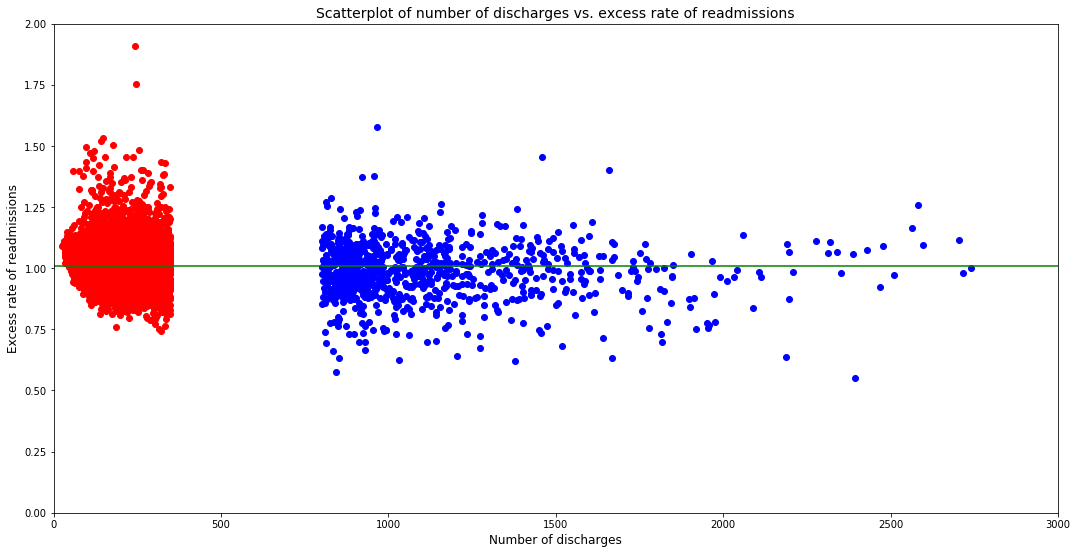

In [89]:
#Create scatterplot of small hospitals with number of discharges as x and excess readmission ratio as y
smallPlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]
smallPlot.dropna()
x_smallPlot = list(smallPlot['Number of Discharges'])
y_smallPlot = list(smallPlot['Excess Readmission Ratio'])

#Create scatterplot of small hospitals with number of discharges as x and excess readmission ratio as y
largePlot = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]
largePlot.dropna()
x_largePlot = list(largePlot['Number of Discharges'])
y_largePlot = list(largePlot['Excess Readmission Ratio'])

fig = plt.figure(figsize=(18, 9))
popMean = clean_hospital_read_df['Excess Readmission Ratio'].mean()
plt.plot(x_smallPlot, y_smallPlot, 'ro')
plt.plot(x_largePlot, y_largePlot, 'bo')

#Add a reference line at the mean for the population
plt.axhline(y = popMean, color='g', linestyle='-')

plt.xlim([0, 3000]);
plt.ylim([0, 2.0]);
plt.xlabel('Number of discharges', fontsize=12);
plt.ylabel('Excess rate of readmissions', fontsize=12);
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14);

## counclusion 

We start by examining the diffference of mean excess readmission rates of small and large hospitals compared to the sample mean. Based on graphs, we clearly see that there is no correlation 